In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
import numpy as np


In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv"
df = pd.read_csv(url)


In [3]:
df.columns = ['Date', 'Sales']


In [4]:
df['Date'] = pd.to_datetime(df['Date'])


In [5]:
df.set_index('Date', inplace=True)


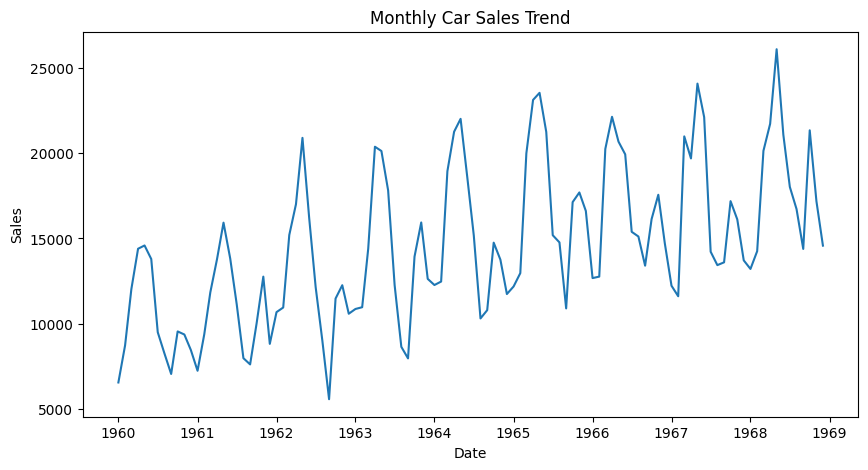

In [6]:
plt.figure(figsize=(10,5))
plt.plot(df['Sales'])
plt.title("Monthly Car Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [7]:
rolling_mean = df['Sales'].rolling(window=3).mean()


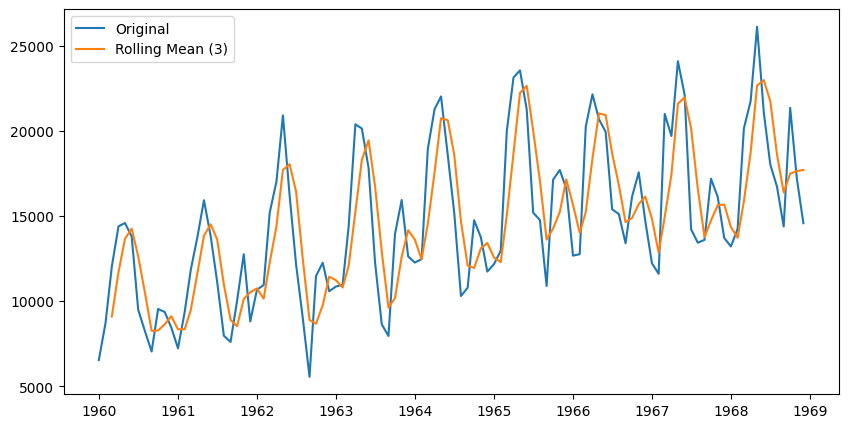

In [8]:
plt.figure(figsize=(10,5))
plt.plot(df['Sales'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean (3)')
plt.legend()
plt.show()


In [9]:
train_size = int(len(df) * 0.8)
train = df['Sales'][:train_size]
test = df['Sales'][train_size:]


In [10]:
model = ExponentialSmoothing(train, trend='add', seasonal=None)
fit_model = model.fit()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [11]:
forecast = fit_model.forecast(len(test))


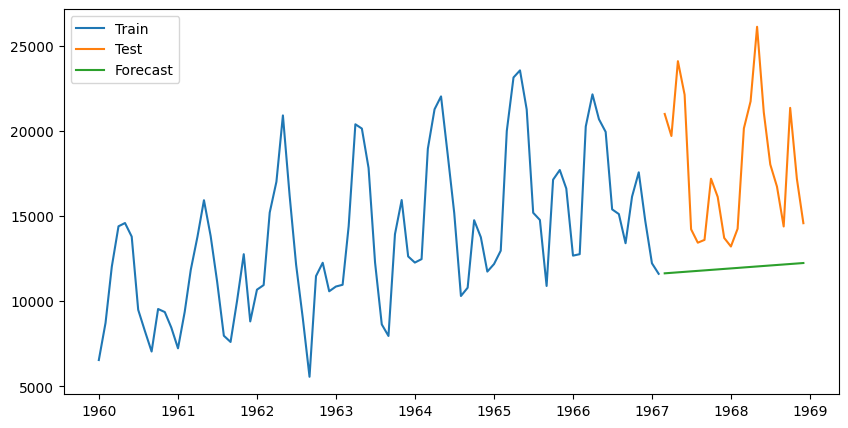

In [12]:
plt.figure(figsize=(10,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()


In [13]:
mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("MAE:", mae)
print("MAPE:", mape)


MAE: 5964.716448264707
MAPE: 30.396461478392123


In [14]:
forecast_df = pd.DataFrame({
    "Actual": test.values,
    "Forecast": forecast.values
}, index=test.index)

forecast_df.to_csv("forecast_output.csv")
print("Forecast saved as forecast_output.csv")


Forecast saved as forecast_output.csv


In [15]:
# Improved Model with Seasonality (12 months cycle)

model = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    seasonal_periods=12
)

fit_model = model.fit()

forecast = fit_model.forecast(len(test))


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [16]:
mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("Improved MAE:", mae)
print("Improved MAPE:", mape)


Improved MAE: 1424.1829557581204
Improved MAPE: 7.814419002444615


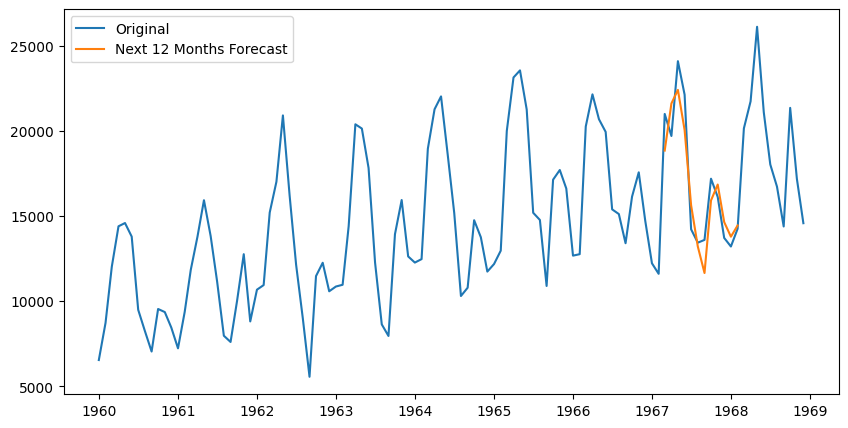

In [17]:
future_forecast = fit_model.forecast(12)

plt.figure(figsize=(10,5))
plt.plot(df['Sales'], label='Original')
plt.plot(future_forecast, label='Next 12 Months Forecast')
plt.legend()
plt.show()


In [18]:
future_df = pd.DataFrame({
    "Future Forecast": future_forecast
})

future_df.to_csv("future_12_months_forecast.csv")
